In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("customer.csv")

In [3]:
data=pd.DataFrame(data)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.columns

Index(['age', 'gender', 'review', 'education', 'purchased'], dtype='object')

In [6]:
data.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [7]:
data.shape

(50, 5)

In [8]:
data.dtypes

age           int64
gender       object
review       object
education    object
purchased    object
dtype: object

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
num_cols=data.columns[data.dtypes!="O"]
cat_cols=data.columns[data.dtypes=="O"]
print(num_cols)
cat_cols

Index(['age'], dtype='object')


Index(['gender', 'review', 'education', 'purchased'], dtype='object')

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [13]:
type(data)

pandas.core.frame.DataFrame

<Axes: >

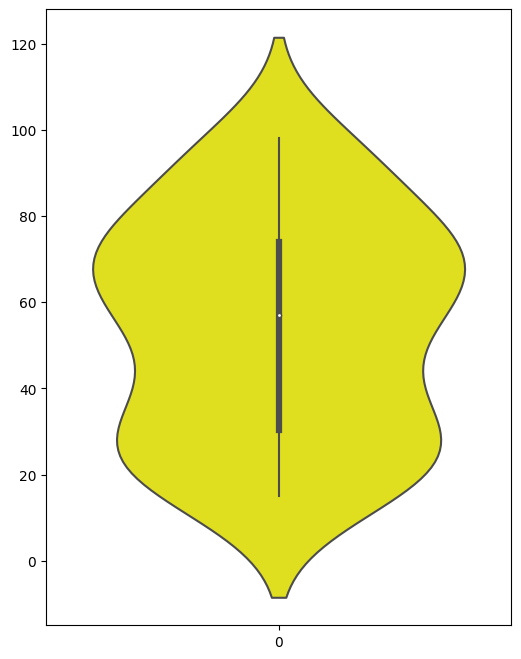

In [14]:
#plot violinplot for age 
plt.figure(figsize=[6,8])
sns.violinplot(data["age"],color='yellow')

<Axes: xlabel='age', ylabel='Count'>

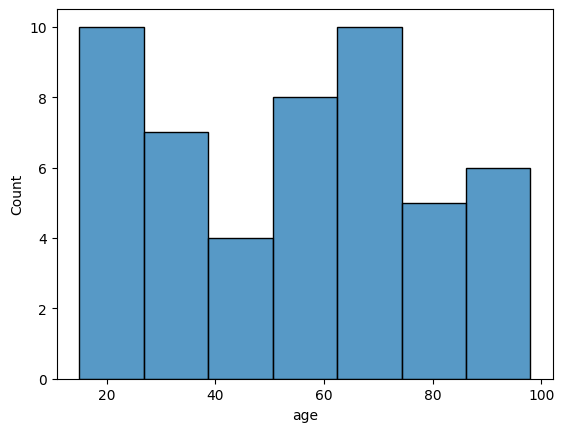

In [15]:
sns.histplot(data,x="age")

In [16]:
data[cat_cols]["gender"].value_counts()

gender
Female    29
Male      21
Name: count, dtype: int64

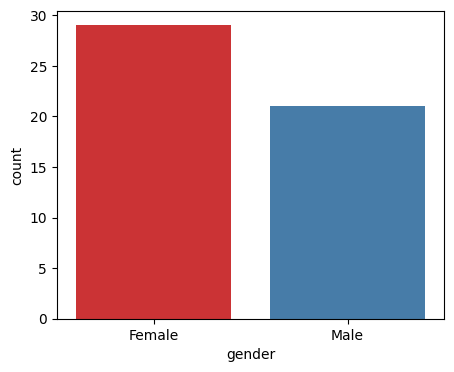

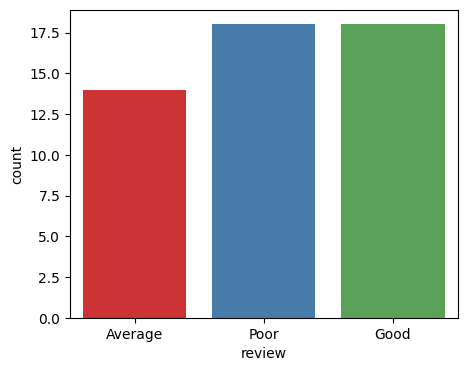

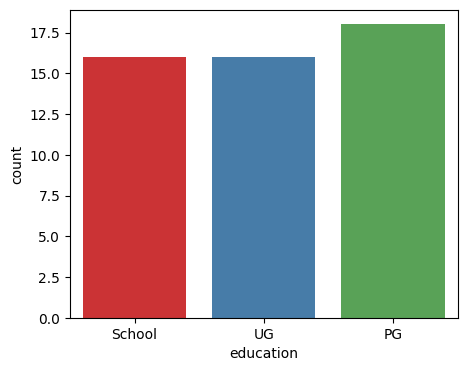

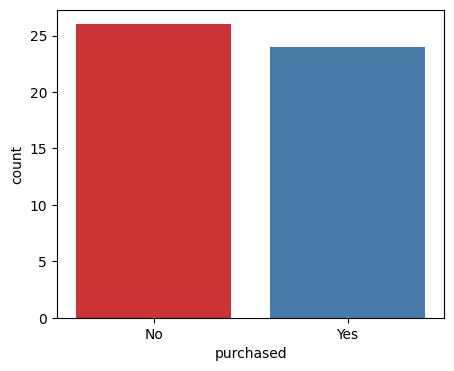

In [17]:
# plot for categorical columns
for i in cat_cols:
    plt.figure(figsize=[5,4])
    sns.countplot(data,x=i,palette="Set1")

In [18]:
type(data)

pandas.core.frame.DataFrame

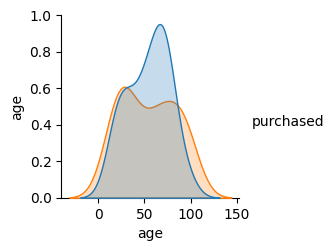

In [19]:
#plot pair plot
sns.pairplot(data,hue="purchased")
plt.show()

In [20]:
type(data)

pandas.core.frame.DataFrame

In [21]:
from sklearn.preprocessing import StandardScaler


sl=StandardScaler()

for i in data.columns:
    if data[i].dtypes != "O":
        data[[i]] = sl.fit_transform(data[[i]])

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
print(type(data))
for i in data.columns:
    if data[i].dtypes == "O":
        data[[i]] = OE.fit_transform(data[[i]])
        


<class 'pandas.core.frame.DataFrame'>


In [24]:
X=data.drop(labels="purchased",axis=1)

In [25]:
y=data[["purchased"]]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [29]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

Lr.fit(X_train,y_train)

y_pred=Lr.predict(X_test)

acc_score=accuracy_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
x=cross_val_score(Lr,X,y,cv=10,scoring='accuracy')

print("Accuracy score is :",acc_score)
print('corss val score :',np.mean(x))
print("mean_absolute_error ",mae)
print("mean_squared_error:",mse)

<IPython.core.display.Javascript object>

Accuracy score is : 0.4
corss val score : 0.3
mean_absolute_error  0.6
mean_squared_error: 0.6


In [30]:
from sklearn.neighbors import KNeighborsClassifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# models={
#     "SVC":SVC(),
#     "KNN":KNeighborsClassifier(),
#     "DTC":DecisionTreeClassifier()
# }

In [33]:
from sklearn.svm import SVC

In [34]:
clf2=SVC(kernel="linear")

In [36]:
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
acc_clf2=accuracy_score(y_test,y_pred2)
print("accuracy score at linear kerel :",acc_clf2)

accuracy score at linear kerel : 0.4


In [37]:
clf3=SVC(kernel="rbf")
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
acc_clf3=accuracy_score(y_test,y_pred3)
print("accuracy score at linear kerel :",acc_clf3)

accuracy score at linear kerel : 0.6


In [38]:
clf4=SVC(kernel="poly",degree=4)
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
acc_clf4=accuracy_score(y_test,y_pred4)
print("accuracy score at linear kerel :",acc_clf4)

accuracy score at linear kerel : 0.8


In [39]:
#decision tree classifiers

dtc=DecisionTreeClassifier()

dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
acc_dtc=accuracy_score(y_test,y_pred_dtc)
print("acc_dtc :",acc_dtc)

acc_dtc : 0.5


In [40]:
param_grid={
    "max_depth":[2,3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[2,3,4]
}


In [41]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtc,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [42]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [43]:
model=DecisionTreeClassifier(max_depth=4, min_samples_leaf= 3, min_samples_split= 2)

In [44]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [45]:
y_pred_dt=model.predict(X_test)
acc_dt=accuracy_score(y_test,y_pred_dt)
print("acc_dt :",acc_dt)

acc_dt : 0.6


In [46]:
# evaluate using KNeighborsClassifier
KNN=KNeighborsClassifier()

KNN.fit(X_train,y_train)
y_pred_KNN=KNN.predict(X_test)
acc_KNN=accuracy_score(y_test,y_pred_KNN)
print("acc_KNN :",acc_KNN)

acc_KNN : 0.5


In [56]:
# using votjngclassifier

from sklearn.ensemble import VotingClassifier
cf1=SVC()
cf2=DecisionTreeClassifier()
cf3=KNeighborsClassifier()

In [57]:
estimators=[("SVC",cf1),("DTC",cf2),("KNN",cf3)]

In [58]:
for i in estimators:
    x=cross_val_score(i[1],X,y,cv=5,scoring="accuracy")
    print(i[0] ,np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

SVC 0.54


<IPython.core.display.Javascript object>

DTC 0.58


<IPython.core.display.Javascript object>

KNN 0.44


In [59]:
VC=VotingClassifier(estimators=estimators,voting="hard")
VChc=cross_val_score(VC,X,y,cv=5,scoring="accuracy")
print("cv of hard voting :",round(np.mean(VChc),2))

<IPython.core.display.Javascript object>

cv of hard voting : 0.48


In [60]:
VCs=VotingClassifier(estimators=estimators,voting="soft")
VCsc=cross_val_score(VCs,X,y,cv=5,scoring="accuracy")
print("cv of soft voting :",round(np.mean(VCsc),2))

<IPython.core.display.Javascript object>

cv of soft voting : nan
